In [1]:
## install

!apt-get install xvfb
!pip install 'gym==0.10.11'
!pip install 'imageio==2.4.0'
!pip install PILLOW
!pip install 'pyglet==1.3.2'
!pip install pyvirtualdisplay
!pip install tf-agents-nightly
try:
  %%tensorflow_version 2.x
except:
  pass

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 783 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.3 [783 kB]
Fetched 783 kB in 1s (709 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 145605 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.3_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.3) ...
Setting up xvfb (2:1.19.6-1ubuntu4.3) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 1.5MB 4.8MB/s 
  Created wheel for gym: filename

In [13]:
## setup

from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import PIL.Image
import pyvirtualdisplay

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

tf.compat.v1.enable_v2_behavior()

# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

# SAC
from tf_agents.agents.ddpg import critic_network

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


In [ ]:
## hyperparameter

ENV_NAME = "CartPole-v0"
# critic network
critic_joint_fc_layer_params = (256, 256)

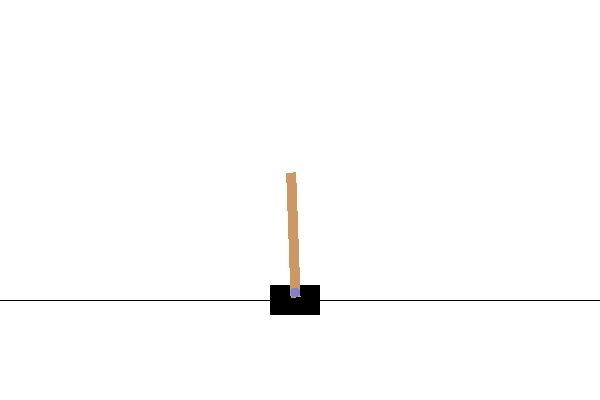

In [12]:
## environment

#@test {"skip": true}
train_py_env = suite_gym.load(ENV_NAME)
eval_py_env = suite_gym.load(ENV_NAME)
train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

train_py_env.reset()
PIL.Image.fromarray(train_py_env.render())

# print("observation", env.time_step_spec().observation)
# print("action", env.action_spec())
# print("reward", env.time_step_spec().reward)

In [ ]:
## network

observation_spec = train_env.observation_spec()
action_spec = train_env.action_spec()

critic_net = critic_network.CriticNetwork((observation_spec, action_spec),
                                          observation_fc_layer_params = None,
                                          action_fc_layer_params = None,
                                          joint_fc_layer_params = critic_joint_fc_layer_params)